# Introduction
HTS에서 광고뉴스를 제거하면 쾌적하다.  
많이 사용되는 단어를 찾고 제외한다.  
주의사항: 진짜 뉴스기사를 제외시키지는 않는지 한번씩 체크하고 제외할 단어로 선정한다.  
유튜브: https://youtu.be/ghYAUrEXV3s

# Import

In [130]:
import pandas as pd
from konlpy.tag import Okt
from collections import Counter
from matplotlib import pyplot as plt
import matplotlib
%matplotlib inline

# Load

In [131]:
df = pd.read_excel('hts_news.xlsx', names=['일자','시간','제목','종목코드','종목명','언론사'])
df['일자'] = df['일자'].astype(str)
df['시간'] = df['시간'].astype(str)
df.head()

,일자,시간,제목,종목코드,종목명,언론사
0,2022-04-08,23:31:14,"◆""이종목"" 월요일 上터집니다, 바로 매수하세요",003850/005930/053800/005860/001440,보령제약,인포스탁
1,2022-04-08,23:12:00,"1500% 터질 ""제2의 현대사료"" 긴급입수!",016790/014200/102280/151860/001390,현대사료,서울경제
2,2022-04-08,22:58:00,내일의 급등 유망주 TOP3 공개,000230/011700/048870/080220/249420,일동홀딩스,뉴스핌
3,2022-04-08,22:51:00,다음주장 옥석 가리기 ▶ 급등 전 확인하는 5선 종목,010145/010040/134580/104200/011700,삼성중공우,이데일리
4,2022-04-08,22:50:00,"일단 묻어두세요 ""이종목"" 폭발합니다 上",048870/179290/005930/060240/066570,시너지이노베이션,이데일리


# Word
HTS에서 제외 가능한 단어는 30개다.  
넉넉하게 빈도수 높은 단어 50개를 찾아본다. 

In [132]:
okt = Okt()
list = []
for title in df['제목']:
    list.append(okt.nouns(title))

word = sum(list,[])

In [133]:
count = Counter(word).most_common()[:50]

# Visualization

In [134]:
df_count = pd.DataFrame(count)

In [135]:
matplotlib.rcParams['font.family'] = 'Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] = False

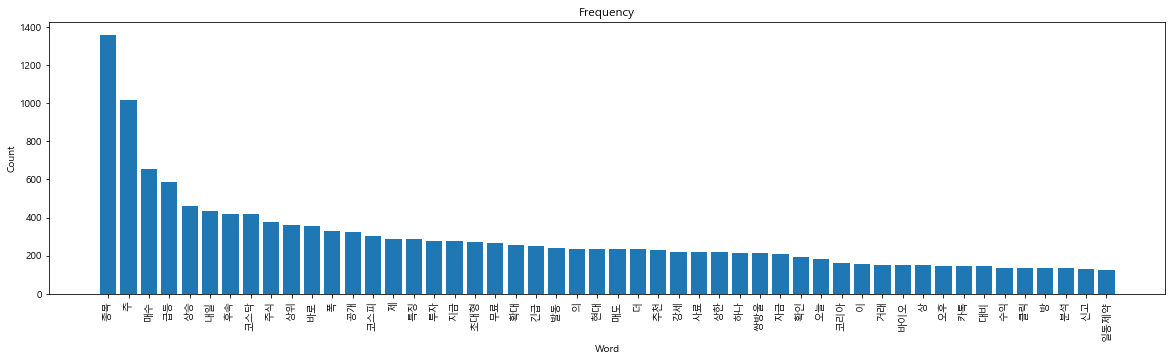

In [137]:
plt.bar(df_count[0],df_count[1])
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.xlabel('Word')
plt.title('Frequency')
plt.rcParams["figure.figsize"] = (20, 5)
plt.show()

# Conclusion
'종목, 매수, 내일, 후속, 코스닥, 주식, 상위, 바로, 공개,   
지금, 초대형, 무료, 긴급, 매도, 추천, 확인, 오늘, 오후, 카톡,   
수익, 클릭, 분석, 상품, 오전, 크게, 현재, 금리, 기관, 부자, 황금'  
  
까지 총 30개 단어를 제외하였다. 